#Pizza Place Sales Analysis

##Introduction

The purpose of this analysis is to explore and understand sales patterns from a year’s worth of data collected at a fictitious pizza place. By analyzing the data, we aim to uncover insights into customer ordering behavior, revenue drivers, and product performance, which can help guide business decisions such as menu optimization, staffing, and promotions.

##Dataset Description

The dataset is provided in four CSV files:

Orders.csv → Contains information about each order, including order ID, date, and time.

Order_Details.csv → Contains the individual items within each order, including order ID, pizza ID, and quantity.

Pizzas.csv → Contains details about each pizza, including pizza ID, size, price, and corresponding pizza type.

Pizza_Types.csv → Contains information about pizza types, including name, category, and ingredients.

##Key Questions to Answer

What is the total revenue generated?

How many pizzas were sold in total?

How many unique orders were placed?

How many different pizza types are offered on the menu?

What is the average price of pizzas?

What are the peak hours for sales?

Which days of the week have the highest sales?

What are the top 5 bestselling pizzas?

What do monthly sales trends look like, and are there noticeable patterns?

Which pizzas are underperforming on the menu?

#Importing Libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the datasets

In [28]:
orders = pd.read_csv(r"orders.csv")
order_details = pd.read_csv(r"order_details.csv")
pizzas = pd.read_csv(r"pizzas.csv")
pizza_types = pd.read_csv("pizza_types.csv", encoding="latin1")

#Joining the datasets

In [29]:
# Merge all four CSVs into one DataFrame
df = order_details.merge(orders, on="order_id", how="left") \
                  .merge(pizzas, on="pizza_id", how="left") \
                  .merge(pizza_types, on="pizza_type_id", how="left")

In [30]:
# Convert date and time columns to proper formats
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"])

/tmp/ipython-input-3746722893.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


In [31]:
df.head()

order_details_id  order_id       pizza_id  quantity       date  \
0                 1         1     hawaiian_m         1 2015-01-01   
1                 2         2  classic_dlx_m         1 2015-01-01   
2                 3         2  five_cheese_l         1 2015-01-01   
3                 4         2    ital_supr_l         1 2015-01-01   
4                 5         2     mexicana_m         1 2015-01-01   

                 time pizza_type_id size  price                       name  \
0 2025-09-29 11:38:36      hawaiian    M  13.25         The Hawaiian Pizza   
1 2025-09-29 11:57:40   classic_dlx    M  16.00   The Classic Deluxe Pizza   
2 2025-09-29 11:57:40   five_cheese    L  18.50      The Five Cheese Pizza   
3 2025-09-29 11:57:40     ital_supr    L  20.75  The Italian Supreme Pizza   
4 2025-09-29 11:57:40      mexicana    M  16.00         The Mexicana Pizza   

  category                                        ingredients  
0  Classic           Sliced Ham, Pineapple, Mozzarella Cheese  
1  Classic  Pepperoni, Mushrooms, Red Onions, Red Peppers,...  
2   Veggie  Mozzarella Cheese, Provolone Cheese, Smoked Go...  
3  Supreme  Calabrese Salami, Capocollo, Tomatoes, Red Oni...  
4   Veggie  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...

#Creating the Sales column

In [32]:
df["sales"] = df["quantity"] * df["price"]


In [33]:
df

order_details_id  order_id       pizza_id  quantity       date  \
0                     1         1     hawaiian_m         1 2015-01-01   
1                     2         2  classic_dlx_m         1 2015-01-01   
2                     3         2  five_cheese_l         1 2015-01-01   
3                     4         2    ital_supr_l         1 2015-01-01   
4                     5         2     mexicana_m         1 2015-01-01   
...                 ...       ...            ...       ...        ...   
48615             48616     21348  ckn_alfredo_m         1 2015-12-31   
48616             48617     21348  four_cheese_l         1 2015-12-31   
48617             48618     21348   napolitana_s         1 2015-12-31   
48618             48619     21349     mexicana_l         1 2015-12-31   
48619             48620     21350      bbq_ckn_s         1 2015-12-31   

                     time pizza_type_id size  price  \
0     2025-09-29 11:38:36      hawaiian    M  13.25   
1     2025-09-29 11:57:40   classic_dlx    M  16.00   
2     2025-09-29 11:57:40   five_cheese    L  18.50   
3     2025-09-29 11:57:40     ital_supr    L  20.75   
4     2025-09-29 11:57:40      mexicana    M  16.00   
...                   ...           ...  ...    ...   
48615 2025-09-29 21:23:10   ckn_alfredo    M  16.75   
48616 2025-09-29 21:23:10   four_cheese    L  17.95   
48617 2025-09-29 21:23:10    napolitana    S  12.00   
48618 2025-09-29 22:09:54      mexicana    L  20.25   
48619 2025-09-29 23:02:05       bbq_ckn    S  12.75   

                             name category  \
0              The Hawaiian Pizza  Classic   
1        The Classic Deluxe Pizza  Classic   
2           The Five Cheese Pizza   Veggie   
3       The Italian Supreme Pizza  Supreme   
4              The Mexicana Pizza   Veggie   
...                           ...      ...   
48615   The Chicken Alfredo Pizza  Chicken   
48616       The Four Cheese Pizza   Veggie   
48617        The Napolitana Pizza  Classic   
48618          The Mexicana Pizza   Veggie   
48619  The Barbecue Chicken Pizza  Chicken   

                                             ingredients  sales  
0               Sliced Ham, Pineapple, Mozzarella Cheese  13.25  
1      Pepperoni, Mushrooms, Red Onions, Red Peppers,...  16.00  
2      Mozzarella Cheese, Provolone Cheese, Smoked Go...  18.50  
3      Calabrese Salami, Capocollo, Tomatoes, Red Oni...  20.75  
4      Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  16.00  
...                                                  ...    ...  
48615  Chicken, Red Onions, Red Peppers, Mushrooms, A...  16.75  
48616  Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...  17.95  
48617  Tomatoes, Anchovies, Green Olives, Red Onions,...  12.00  
48618  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  20.25  
48619  Barbecued Chicken, Red Peppers, Green Peppers,...  12.75  

[48620 rows x 13 columns]

#Analysis

In [34]:
#Calculating the total sales

total_revenue = df["sales"].sum()
total_revenue


np.float64(817860.05)

In [35]:
#Calculating the total quantity

total_quantity = df["quantity"].sum()
total_quantity


np.int64(49574)

In [36]:
#Calculating the total order

total_orders = df["order_id"].nunique()
total_orders


21350

In [37]:
#Number of pizza type

num_pizza_types = df["name"].nunique()
num_pizza_types


32

In [38]:
#Average price of pizza

avg_price = df["price"].mean()
avg_price


np.float64(16.494132044426163)

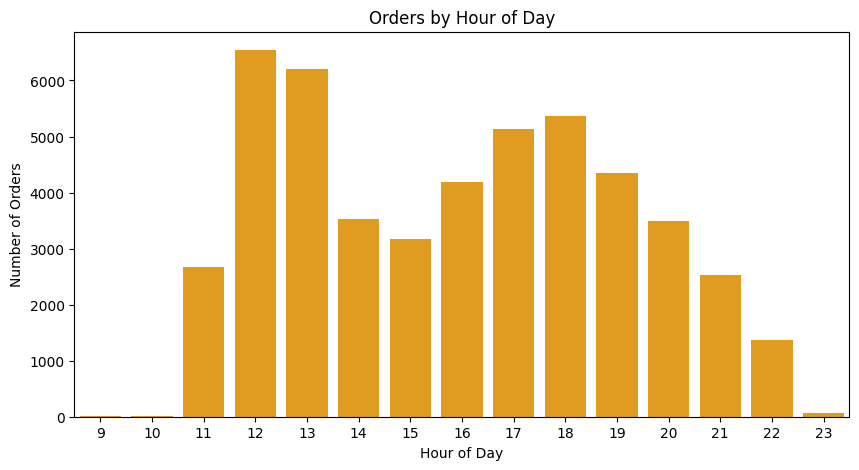

In [39]:
#Peak hours of sales

df["hour"] = df["time"].dt.hour
peak_hours = df.groupby("hour")["order_id"].count()

plt.figure(figsize=(10,5))
sns.barplot(x=peak_hours.index, y=peak_hours.values, color="orange")
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()


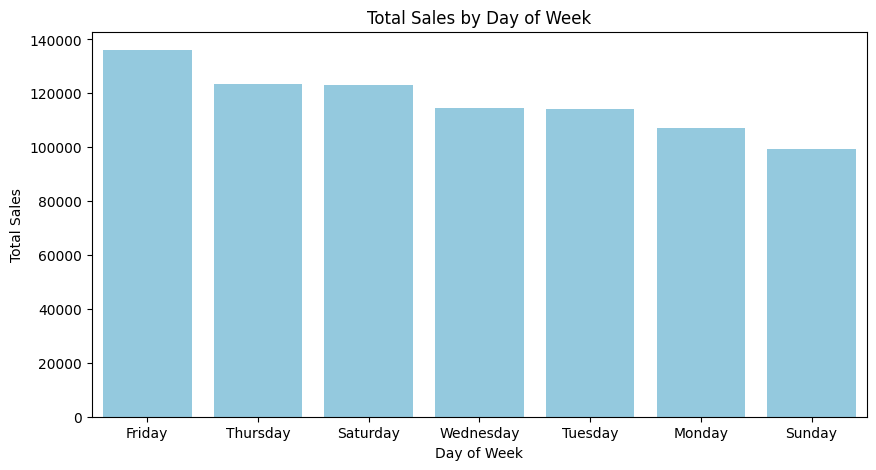

In [40]:
#Sales by Day of the Week

df["day_of_week"] = df["date"].dt.day_name()
sales_by_day = df.groupby("day_of_week")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, color="skyblue")
plt.title("Total Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.show()


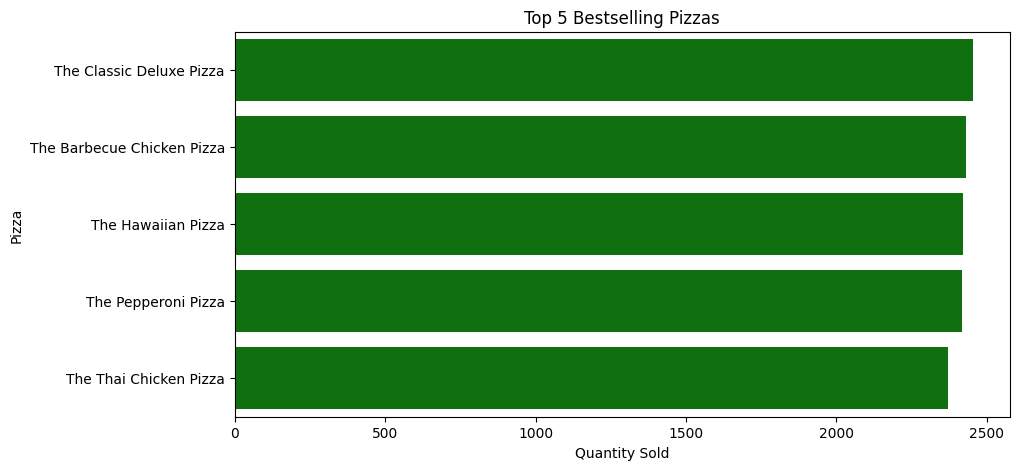

In [41]:
#Top 5 Bestselling Pizzas

bestsellers = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=bestsellers.values, y=bestsellers.index, color="green")
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza")
plt.show()


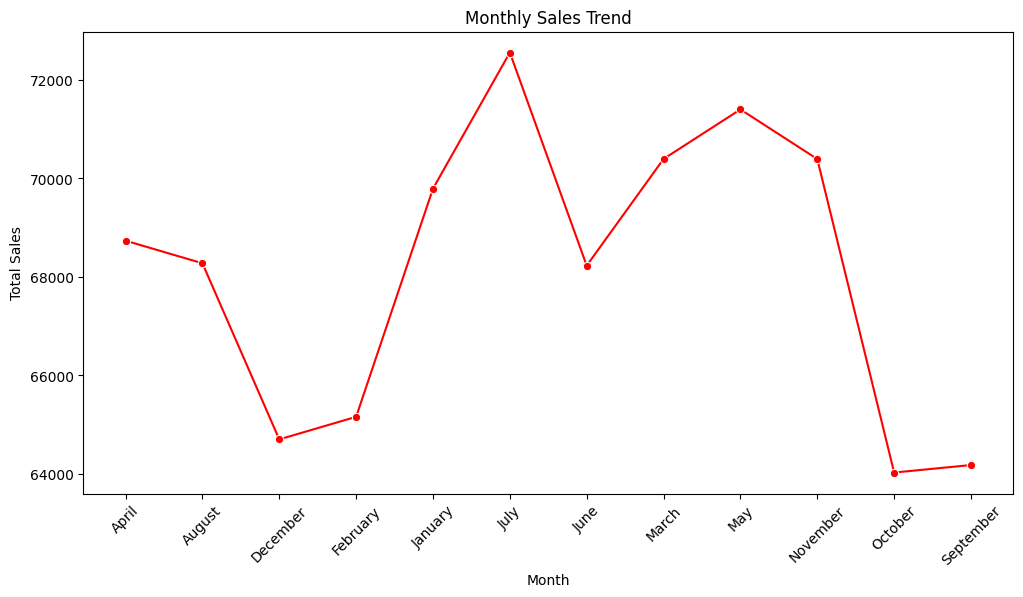

In [42]:
#Monthly Sales Trend

df["month"] = df["date"].dt.month_name()
monthly_sales = df.groupby("month")["sales"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="red")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


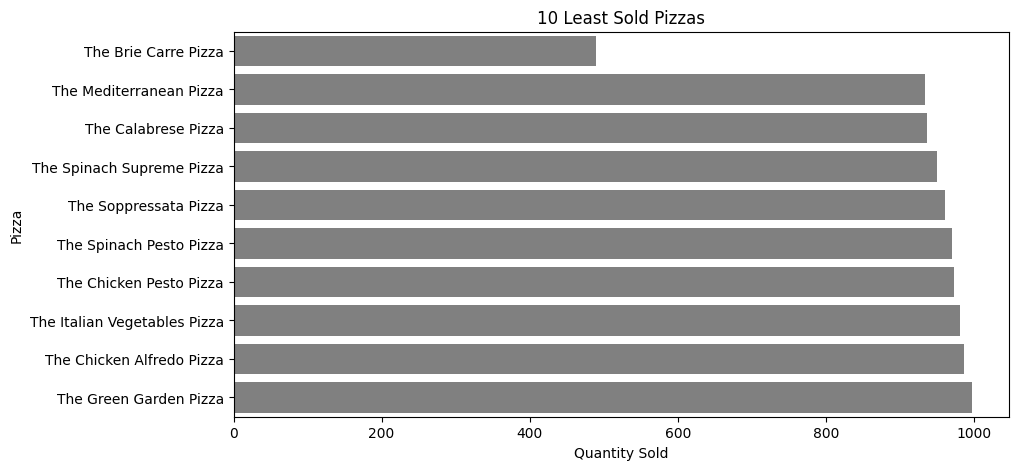

In [43]:
#Poorly Performing Pizzas

low_sales = df.groupby("name")["quantity"].sum().sort_values().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=low_sales.values, y=low_sales.index, color="gray")
plt.title("10 Least Sold Pizzas")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza")
plt.show()


In [44]:
#Average order value

avg_order_value = total_revenue / total_orders
avg_order_value


np.float64(38.30726229508197)

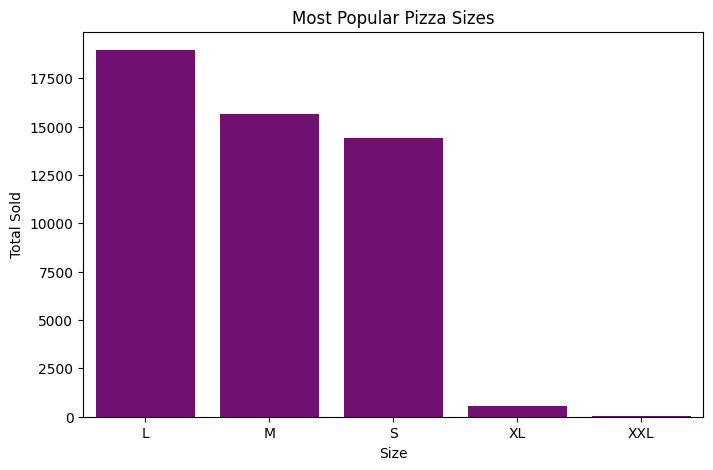

In [45]:
#Most popular pizza sizes

size_distribution = df.groupby("size")["quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=size_distribution.index, y=size_distribution.values, color="purple")
plt.title("Most Popular Pizza Sizes")
plt.xlabel("Size")
plt.ylabel("Total Sold")
plt.show()

#Conclusion

Through this analysis of the Pizza Place Sales dataset, we gained valuable insights into business performance and customer ordering behavior.

#Key Findings

1. Revenue & Sales: We calculated the total revenue generated over the year along with the total quantity of pizzas sold and the number of unique orders.

2. Menu Insights: The dataset revealed the number of pizza types offered, their average prices, and which pizzas are most and least popular.

3. Customer Behavior: Peak sales hours and the busiest days of the week were identified, which can guide staffing and promotional strategies.

4. Trends Over Time: Monthly sales trends highlighted fluctuations in customer demand across the year.

5. Product Performance: Top 5 bestselling pizzas were identified, along with pizzas that consistently underperformed and may be candidates for removal or promotion.


#Final Note

This analysis demonstrates the power of data-driven decision-making in the food and beverage industry. By combining multiple datasets into a single view, we were able to uncover trends and insights that can help improve both profitability and customer satisfaction.